# Logistic Regression using Sklearn on IRIS-DATASET

In [1]:
import pandas as pd
import numpy as np

IMPORT DATASET

In [2]:
data = pd.read_excel(r'C:\Users\bhavy\OneDrive\Desktop\SEM 3\MACHINE LEARNING\data set\iris dataset.xlsx')
data

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


CREATE TRAIN AND TEST DATA AND SEPARATE X AND Y 

In [3]:
data['variety'].unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

MAPPING 

In [4]:
set_class = set(data['variety'])
val = [i+1 for i in range (len(set_class))]
mapping = dict(zip(set_class,val))
mapping

{'Setosa': 1, 'Versicolor': 2, 'Virginica': 3}

In [5]:
data = data.replace({'variety' : mapping})
data.head()

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


In [6]:
x,y = data.drop('variety' , axis=1) , data['variety']

SPLITTING THE DATASET

In [7]:
import sklearn.model_selection as skm

In [8]:
x_train , x_test , y_train , y_test = skm.train_test_split(x,y,test_size = 0.2)

In [9]:
x_train ,y_train

(     sepal.length  sepal.width  petal.length  petal.width
 6             4.6          3.4           1.4          0.3
 30            4.8          3.1           1.6          0.2
 37            4.9          3.6           1.4          0.1
 9             4.9          3.1           1.5          0.1
 19            5.1          3.8           1.5          0.3
 ..            ...          ...           ...          ...
 117           7.7          3.8           6.7          2.2
 111           6.4          2.7           5.3          1.9
 148           6.2          3.4           5.4          2.3
 52            6.9          3.1           4.9          1.5
 113           5.7          2.5           5.0          2.0
 
 [120 rows x 4 columns],
 6      1
 30     1
 37     1
 9      1
 19     1
       ..
 117    3
 111    3
 148    3
 52     2
 113    3
 Name: variety, Length: 120, dtype: int64)

In [10]:
x_test.shape

(30, 4)

In [11]:
y_test.unique()

array([3, 2, 1], dtype=int64)

LOGISTIC REGRESSION

In [12]:
import sklearn.linear_model as sklm
reg = sklm.LogisticRegression()
reg.fit(x_train , y_train)

LogisticRegression()

In [13]:
reg.score(x_train , y_train)

0.9833333333333333

In [22]:
y_pred_reg = reg.predict(x_test)
print(type(y_pred_reg))
y_pred_reg

<class 'numpy.ndarray'>


array([3, 2, 2, 2, 2, 3, 3, 1, 1, 2, 3, 1, 2, 1, 3, 3, 1, 3, 1, 3, 1, 2,
       2, 2, 2, 1, 2, 2, 2, 3], dtype=int64)

In [15]:
y_pred_reg.shape

(30,)

In [16]:
y_pred_reg.ndim

1

In [23]:
reg.score(x_test,y_test) # accuracy is coming out to be 93.3333333333%

0.9333333333333333

In [25]:
for i in range(30):
    print(y_pred_reg[i] == np.array(y_test)[i] , end=',')

True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,True,True,False,True,True,True,True,True,True,True,True,

ACCURACY

In [27]:
correct = 0
incorrect = 0
for i in range(30):
    if y_pred_reg[i] == np.array(y_test)[i]:
        correct += 1
               
accuracy = (correct/30) * 100
incorrect = 30 - correct

print('correct = ',correct,': incorrect = ', incorrect)
print('Accuracy percentage of the algorithm is = ', accuracy)

correct =  28 : incorrect =  2
Accuracy percentage of the algorithm is =  93.33333333333333


CONFUSION MATRIX

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix

In [29]:
confusion_matrix(y_test , y_pred_reg)
# sum of diagonal 8 + 12 + 8 = 28
# 28/30 = 93.33333333333
# way to check

array([[ 8,  0,  0],
       [ 0, 12,  1],
       [ 0,  1,  8]], dtype=int64)

C:\Users\bhavy\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


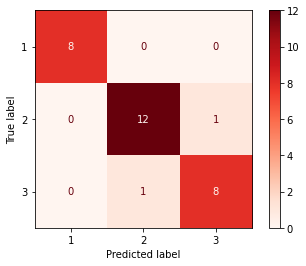

In [34]:
import matplotlib.pyplot as plt
matrix = plot_confusion_matrix(reg , x_test , y_test , cmap=plt.cm.Reds)

PRECISION (TP/TP+FP)

In [41]:
# FOR CLASS 1 IRIS-SETOSA
precision_1 = 8/(8+0+0)
precision_1*100

100.0

In [42]:
# FOR CLASS 2 IRIS-VERSICOLOR
precision_2 = 12/(0+12+1)
precision_2*100

92.3076923076923

In [44]:
# FOR CLASS 3 IRIS-VIRGINICA
precision_3 = 8/(0+1+8)
precision_3*100

88.88888888888889

RECALL (TP/TP+FN)

In [45]:
# FOR CLASS 1 IRIS-SETOSA
recall_1 = 8/(8+0+0)
recall_1*100

100.0

In [46]:
# FOR CLASS 2 IRIS-VERSICOLOR
recall_2 = 12/(0+12+1)
recall_2*100

92.3076923076923

In [47]:
# FOR CLASS 3 IRIS-VIRGINICA
recall_3 = 8/(0+1+8)
recall_3*100

88.88888888888889

F SCORE (HARMONIC MEAN) 2 x [(Precision x Recall) / (Precision + Recall)]

In [53]:
# FOR CLASS 1 IRIS-SETOSA
f_score_1 = 2 * ((precision_1 * recall_1) / (precision_1 + recall_1))
f_score_1

1.0

In [54]:
# FOR CLASS 2 IRIS-VERSICOLOR
f_score_2 = 2 * ((precision_2 * recall_2) / (precision_2 + recall_2))
f_score_2

0.9230769230769231

In [ ]:
# FOR CLASS 3 IRIS-VIRGINICA
f_score_3 = 2 * ((precision_2 * recall_2) / (precision_2 + recall_2))
f_score_3